In [17]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [18]:
data = pd.read_csv("C:\\Users\\Mia\\Нейронка\\users_behavior.csv")
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [19]:
data.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [20]:
data.dtypes

calls       float64
minutes     float64
messages    float64
mb_used     float64
is_ultra      int64
dtype: object

In [21]:
data.groupby(['is_ultra']).mean()

,calls,minutes,messages,mb_used
is_ultra,,,,
0,58.463437,405.942952,33.384029,16208.466949
1,73.392893,511.224569,49.363452,19468.823228


In [22]:
data['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

<AxesSubplot:ylabel='Frequency'>

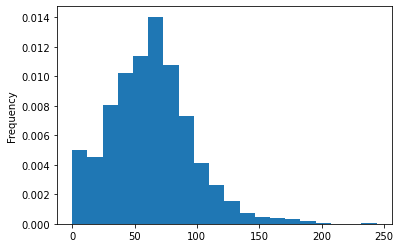

In [23]:
data.calls.plot(kind='hist', density=1, bins=20)

<AxesSubplot:ylabel='Frequency'>

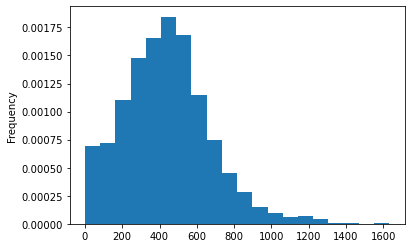

In [24]:
data.minutes.plot(kind='hist', density=1, bins=20)

<AxesSubplot:ylabel='Frequency'>

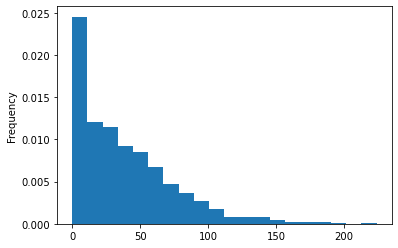

In [25]:
data.messages.plot(kind='hist', density=1, bins=20)

<AxesSubplot:ylabel='Frequency'>

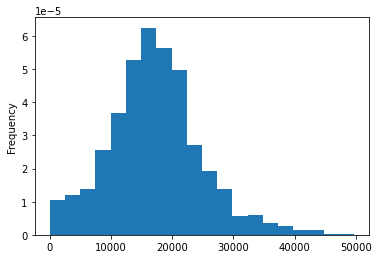

In [26]:
data.mb_used.plot(kind='hist', density=1, bins=20)

In [10]:
data.calls.max()

244.0

In [27]:
data[data['calls'] == 244.0]

,calls,minutes,messages,mb_used,is_ultra
2589,244.0,1632.06,39.0,9756.91,1


In [28]:
X = data[['calls','minutes','messages','mb_used']]
Y = data[['is_ultra']]

In [29]:
train_data, test_data = np.split(data, [int(.9*len(data))])

In [30]:
y_train = train_data.is_ultra
x_train = train_data.drop('is_ultra',axis=1)

y_test = test_data.is_ultra
x_test = test_data.drop('is_ultra',axis=1)

In [31]:
y_train

0       0
1       0
2       0
3       1
4       0
       ..
2887    0
2888    1
2889    0
2890    0
2891    0
Name: is_ultra, Length: 2892, dtype: int64

In [35]:
x_train

,calls,minutes,messages,mb_used
0,40.0,311.90,83.0,19915.42
1,85.0,516.75,56.0,22696.96
2,77.0,467.66,86.0,21060.45
3,106.0,745.53,81.0,8437.39
4,66.0,418.74,1.0,14502.75
...,...,...,...,...
2887,15.0,111.37,4.0,10856.89
2888,142.0,1035.97,42.0,31898.66
2889,37.0,211.53,11.0,14912.46
2890,64.0,465.08,0.0,22535.20


## K-nearest Neighbors (KNN) Classification Model

In [36]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.7857142857142857

## Linear Classifier with Perceptron

In [67]:
from sklearn.linear_model import Perceptron

per = Perceptron(random_state = 40)
per.fit(x_train, y_train)
y_pred = per.predict(x_test)
accuracy_score(y_test, y_pred)

0.7080745341614907

# Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
loanTree = DecisionTreeClassifier(max_depth = 4)

In [70]:
loanTree.fit(x_train,y_train)
y_pred = loanTree.predict(x_test)
accuracy_score(y_test, y_pred)

0.8105590062111802

пока лучшая модель